In [58]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import HuberRegressor

from sklearn.metrics import r2_score

data = pd.read_csv('./src/USA_cars_datasets.csv')

def replace_string_values(data, sorted_unique_values):
    i = 0
    values = {}

    for value in sorted_unique_values:
        if value in values:
            continue

        values[value] = i

        i += 1

    return np.array(list(map(lambda x : values[x], data)))

def sorted_by_avg_price(values):
    x_values = np.unique(values)  
    y_values = []

    for x in x_values:
        y_values.append(data.price.values[values == x].mean())

    df = pd.DataFrame({
        'x_values': x_values,
        'y_values': y_values
    }).sort_values(by=['y_values'])

    return list(df.x_values)

def plot(x, y, y1, y2, label1, label2):
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y)
    plt.xlabel('Model')
    plt.ylabel('Mileage')
    plt.title('Mileage by model')
    plt.plot(x, y1, color='r', label = label1)
    plt.plot(x, y2, color='g', label = label2)
    plt.legend()

В данном разделе посравниваем различные регрессии. Для оценки будем использовать графический способ, а также r2 фактор. В качестве зависимости возьмем взаимосвязь цены авто от модели автомобиля.

Ridge R2:  0.5397208869536283
Linear R2:  0.5397209148346028


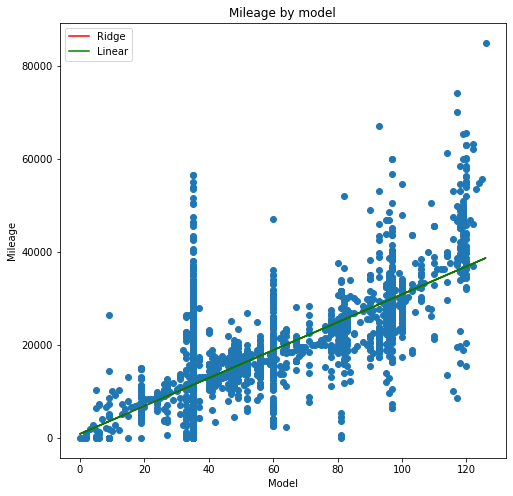

In [53]:
x = replace_string_values(data.model.values, sorted_by_avg_price(data.model.values)).reshape(-1, 1)
y = data.price.values

model = Ridge(alpha=500.5).fit(x,y)
model2 = LinearRegression().fit(x,y)

y_pred = model.predict(x)
y_pred2 = model2.predict(x)

plot(x, y, y_pred, y_pred2, 'Ridge', 'Linear')

errors_with_cross = y - y_pred

print('Ridge R2: ', r2_score(y, y_pred))

errors_with_cross = y - y_pred2

print('Linear R2: ', r2_score(y, y_pred2))

Для данной зависимости гребневая регрессия подходит чуточку лучше. Сравним стандартную LinearRegression с моделью с применением PolynomialFeatures.

Polynomial R2:  0.577103909799492
Linear R2:  0.5397209148346028


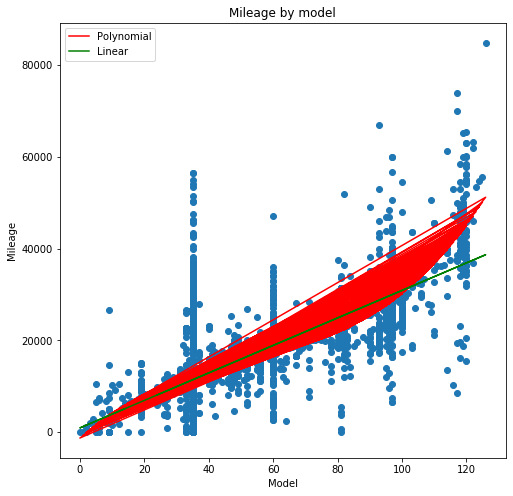

In [56]:
poly = PolynomialFeatures(degree=3)

X = poly.fit_transform(x)

model = LinearRegression().fit(X, y)
model2 = LinearRegression().fit(x,y)

y_pred = model.predict(X)
y_pred2 = model2.predict(x)

plot(x, y, y_pred, y_pred2, 'Polynomial', 'Linear')

errors_with_cross = y - y_pred

print('Polynomial R2: ', r2_score(y, y_pred))

errors_with_cross = y - y_pred2

print('Linear R2: ', r2_score(y, y_pred2))

А в данном сравнении победила стандартная линейная модель.

Huber R2:  0.5397134496467082
Ridge R2:  0.5397208869536283


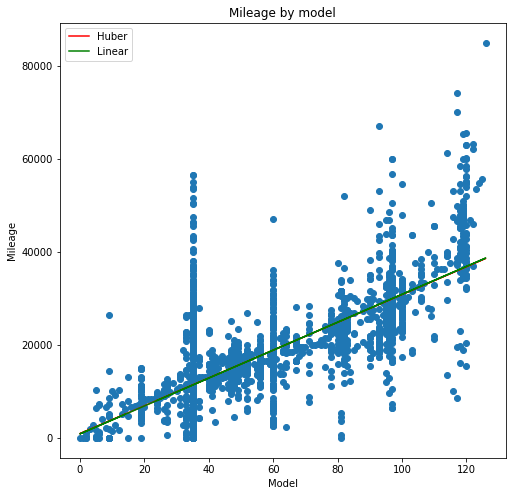

In [57]:
model = HuberRegressor(epsilon=1e5, alpha=1.0).fit(x,y)
model2 = Ridge(alpha=500.5).fit(x,y)

y_pred = model.predict(x.reshape(-1,1))
y_pred2 = model2.predict(x)

plot(x, y, y_pred, y_pred2, 'Huber', 'Linear')

errors_with_cross = y - y_pred

print('Huber R2: ', r2_score(y, y_pred))

errors_with_cross = y - y_pred2

print('Ridge R2: ', r2_score(y, y_pred2))

Можно сделать вывод, что для данной зависимости регрессия Хубера подходит лучше всего.